## Name : Govind Shukla

## 1] SIFT Algorithm

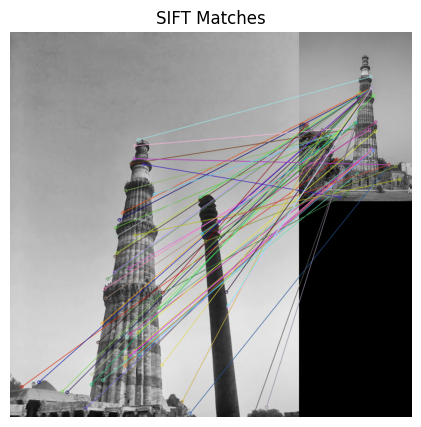

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('/content/AABB.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/AACC.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches_sift = [m for m, n in matches if m.distance < 0.75 * n.distance]

sift_result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize=(10, 5))
plt.imshow(sift_result)
plt.title("SIFT Matches")
plt.axis('off')
plt.show()

## 2] RANSAC Algorithm

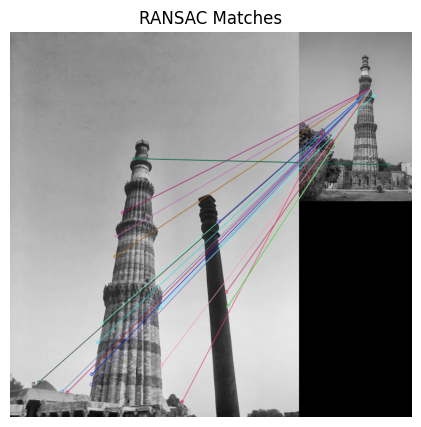

In [10]:
image1 = cv2.imread('/content/AABB.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/AACC.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches_sift = [m for m, n in matches if m.distance < 0.75 * n.distance]

points1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches_sift], dtype=np.float32)
points2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches_sift], dtype=np.float32)

H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

inlier_matches = [m for i, m in enumerate(good_matches_sift) if mask[i]]

ransac_result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, inlier_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 5))
plt.imshow(ransac_result)
plt.title("RANSAC Matches")
plt.axis('off')
plt.show()

##  3] BRIEF (Binary Robust Independent Elementary Features)

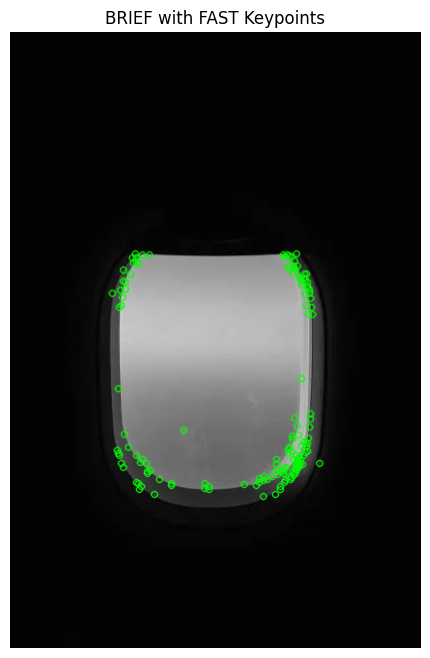

In [13]:
image = cv2.imread('/content/window.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(image, None)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypoints, descriptors = brief.compute(image, keypoints)

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

image_with_keypoints = cv2.drawKeypoints(image_color, keypoints, None, color=(0, 255, 0))

plt.figure(figsize=(8, 8))
plt.imshow(image_with_keypoints)
plt.title("BRIEF with FAST Keypoints")
plt.axis('off')
plt.show()

## 4] Harris Corner Detection

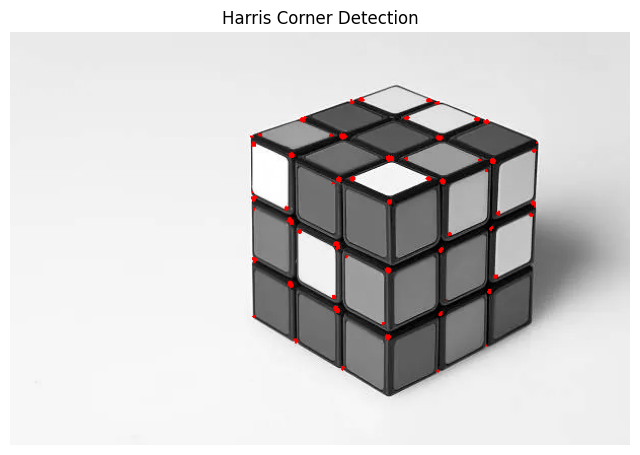

In [14]:
image = cv2.imread('/content/rubis.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

Ix2 = dx ** 2
Iy2 = dy ** 2
Ixy = dx * dy

Ix2 = cv2.GaussianBlur(Ix2, (5, 5), 0)
Iy2 = cv2.GaussianBlur(Iy2, (5, 5), 0)
Ixy = cv2.GaussianBlur(Ixy, (5, 5), 0)

k = 0.04
det_M = (Ix2 * Iy2) - (Ixy ** 2)
trace_M = Ix2 + Iy2
R = det_M - k * (trace_M ** 2)


threshold = 0.01 * R.max()
corners = np.zeros_like(R)
corners[R > threshold] = 255

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

image_with_corners = image_color.copy()
image_with_corners[corners == 255] = [0, 0, 255]

image_with_corners_rgb = cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image_with_corners_rgb)
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()